In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os, sys, glob, shutil
os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()

'/Users/shubham/work/hurricane_damage_prediction'

In [7]:
sys.path.append("Semantic-segmentation-on-buildings/")

In [51]:
import tensorflow as tf
import gdal
import numpy as np 
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
from PIL import Image

In [8]:
from model import FCN2

In [85]:
img_name = "data/train_by_disaster/hurricane-harvey/images/hurricane-harvey_00000012_pre_disaster.png"
pre_img = Image.open(img_name)
post_img = Image.open(img_name.split("pre")[0] + "post_disaster.png")

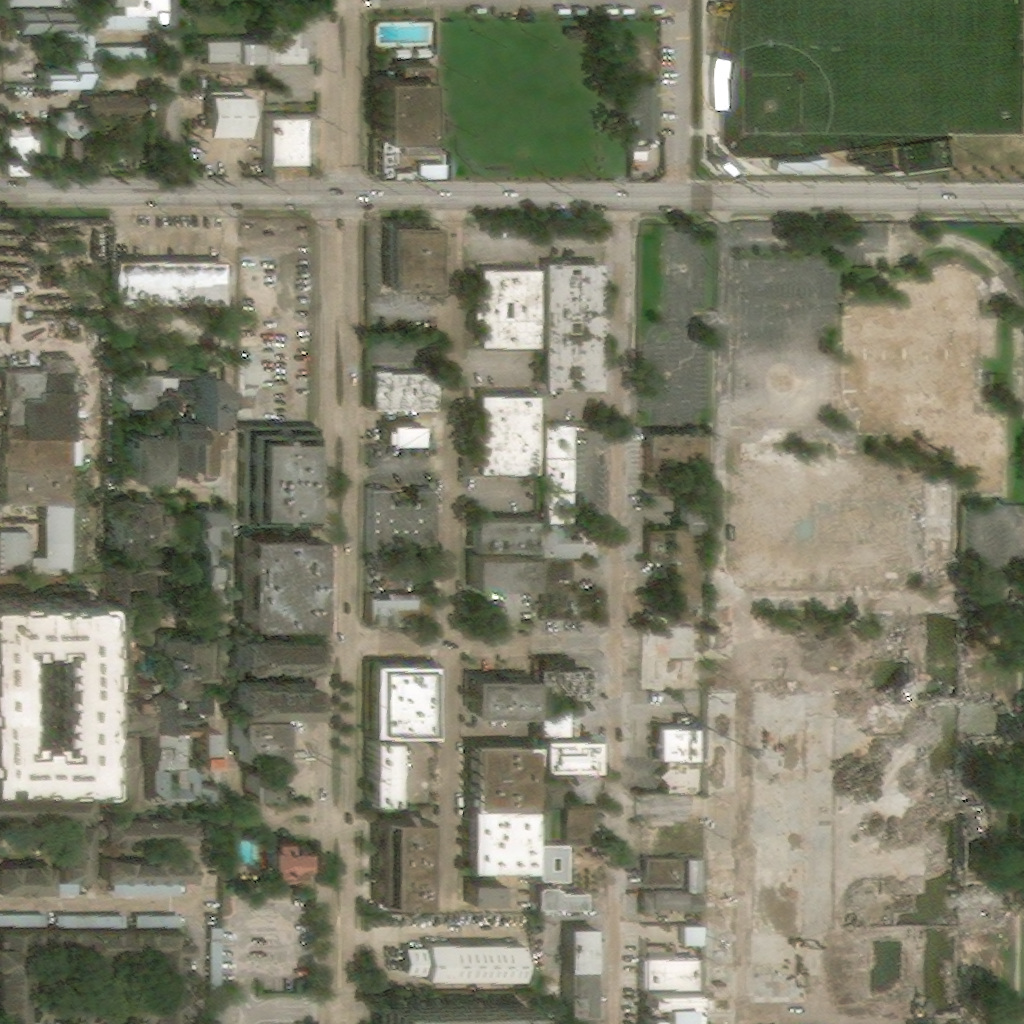

In [86]:
post_img

In [73]:
pre_img.size

(1024, 1024)

In [12]:
model_nn = FCN2(pre_img.size[0])

model_nn.model.load_weights("Semantic-segmentation-on-buildings/weights.best.hdf5")

In [77]:
def predict_image(image,model):
    '''
    Predict one image with the model. Returns a binary array
    Parameters
    ----------
    image : np.ndarray
        rgb input array of the (n,d,3)
    model : Model object
        trained model for the prediction of image (tile_size * tile_size)
    '''
    shape_im = image.shape
    image = image/127.5 - 1.0 # normalise data
    predicted_image = model.model.predict(image.reshape(1,shape_im[0], shape_im[1],3))    
    predicted_image = predicted_image.reshape(shape_im[0],shape_im[1])     
    predicted_image = (predicted_image> 0.5)*255    
    return predicted_image

In [87]:
pre_image_arr = np.asarray(pre_img)
post_image_arr = np.asarray(post_img)

In [88]:
%%time
pred_pre_img = predict_image(pre_image_arr, model_nn)
pred_post_img = predict_image(post_image_arr, model_nn)

CPU times: user 30.1 s, sys: 17.1 s, total: 47.2 s
Wall time: 5.99 s


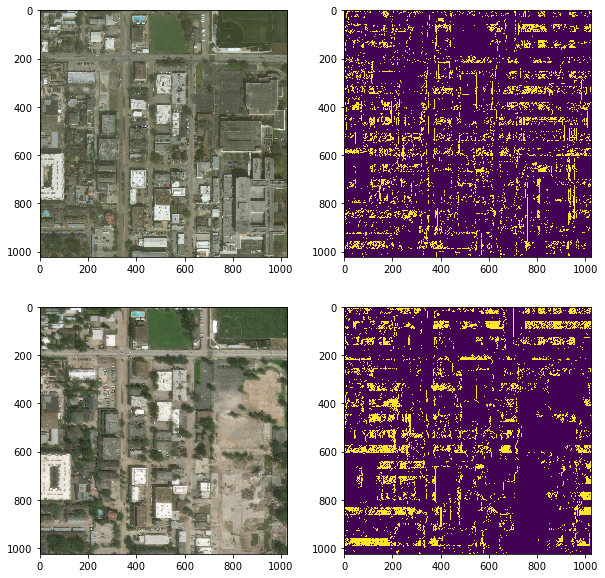

In [89]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].imshow(pre_img)
ax[0,1].imshow(pred_pre_img)
ax[1,0].imshow(post_img)
ax[1,1].imshow(pred_post_img)

plt.show()